## NUKALA NAGA PAVAN

#                        Lab exercise 4(Regression-Supervised Learning) 
##                                                 07/06/2018

## Consider ‘Smarket’ data set from ISLR library. This data set is daily percentage returns for the S&P 500 stock index between 2001 and 2005. For more information about ‘Smarket’ data set, use ‘? Smarket’ in R
## Question: Predict the direction of market by using logistic regression
## Technology to be used: Python (Jupyter notebook)


In [188]:
import pandas as pd
import numpy as np
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [189]:
df = pd.read_csv( "Smarket.csv" )

In [190]:
df.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [191]:
len(df)

1250

In [192]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


## The target variable is "Direction",which is categorical.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


## Adding a column which represents the "Direction column" with Up as "1" , Down as "0"

In [194]:
#df[df.Direction == "Up"]["Direction_DUM"] =1
df['Direction_DUM'] = df.Direction.map( lambda x: 1 if x == "Up" else 0)

In [195]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_DUM
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,1


In [196]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_DUM
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095,0.074608
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155,-0.039757
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250,-0.024081
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448,0.006132
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900,0.004215
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860,0.005423
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592,0.022951
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000,0.730563
Direction_DUM,0.074608,-0.039757,-0.024081,0.006132,0.004215,0.005423,0.022951,0.730563,1.000000


## 'Today' column is observed to have 73% correlation with the response variable 'Direction_DUM'
## So, we shall remove 'Today' column to avoid Multicollinearity.

In [197]:
var = list(df.columns)
var.remove( 'Direction' )
var.remove( 'Direction_DUM')
var.remove( 'Today')
var

['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

In [198]:
df_complete = df[var]

In [199]:
df_complete.head().T

,0,1,2,3,4
Year,2001.0000,2001.0000,2001.0000,2001.000,2001.0000
Lag1,0.3810,0.9590,1.0320,-0.623,0.6140
Lag2,-0.1920,0.3810,0.9590,1.032,-0.6230
Lag3,-2.6240,-0.1920,0.3810,0.959,1.0320
Lag4,-1.0550,-2.6240,-0.1920,0.381,0.9590
Lag5,5.0100,-1.0550,-2.6240,-0.192,0.3810
Volume,1.1913,1.2965,1.4112,1.276,1.2057


## The response and predictor variables are to be declared as x & y.

In [200]:
y = df.Direction_DUM

In [201]:
x = df_complete

In [202]:
from sklearn.cross_validation import train_test_split


## Now,the data is to be split into Train and test using the train_test_split function in 70:30 ratio.

In [203]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3)


In [204]:
y_test[0:10]

139     1
176     1
106     0
1008    1
869     1
1042    0
1101    1
871     0
600     1
1093    1
Name: Direction_DUM, dtype: int64

## Fitting Binary choice logit model on x_train and y_train

In [205]:
import statsmodels.api as sm

In [206]:
logit = sm.Logit( y_train, sm.add_constant( x_train ) )

In [207]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.688526
         Iterations 5


In [208]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Direction_DUM   No. Observations:                  875
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Jun 2018   Pseudo R-squ.:                0.006621
Time:                        09:53:48   Log-Likelihood:                -602.46
converged:                       True   LL-Null:                       -606.48
                                        LLR p-value:                    0.3299
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -231.6792    115.908     -1.999      0.046    -458.854      -4.505
Year           0.1158      0.058      1.999      0.046       0.002       0.229
Lag1          -0.0983      0.059     -1.669      0.095      -0.214       0.017
Lag2          -0.0350      0.060     -0.587      0.557      -0.152       0.082
Lag3          -0.0285      0.059     -0.479      0.632      -0.145       0.088
Lag4           0.0392      0.060      0.654      0.513      -0.078       0.157
Lag5           0.0310      0.060      0.519      0.604      -0.086       0.148
Volume        -0.2257      0.222     -1.016      0.309      -0.661       0.210
==============================================================================
"""

In [209]:
def get_significant_vars( lm ):
 var_p_vals_df = pd.DataFrame( lm.pvalues )
 var_p_vals_df['vars'] = var_p_vals_df.index
 var_p_vals_df.columns = ['pvals', 'vars']
 return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [210]:
significant_vars = get_significant_vars( lg )

In [211]:
significant_vars

['const', 'Year']

In [212]:
from sklearn import metrics

In [213]:
def get_predictions( y_test, model ):
 y_pred_df = pd.DataFrame( { 'actual': y_test,
 "predicted_prob": model.predict( sm.add_constant( x_test
) ) } )
 return y_pred_df

In [214]:
y_pred_df = get_predictions( y_test, lg )

In [215]:
y_pred_df[0:10]

,actual,predicted_prob
139,1,0.475014
176,1,0.381176
106,0,0.474246
1008,1,0.556915
869,1,0.541446
1042,0,0.550752
1101,1,0.548180
871,0,0.547486
600,1,0.464372
1093,1,0.467875


In [216]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0)

In [217]:
y_pred_df[0:10]

,actual,predicted_prob,predicted
139,1,0.475014,0
176,1,0.381176,0
106,0,0.474246,0
1008,1,0.556915,1
869,1,0.541446,1
1042,0,0.550752,1
1101,1,0.548180,1
871,0,0.547486,1
600,1,0.464372,0
1093,1,0.467875,0


In [218]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline

In [219]:
def draw_cm( actual, predicted ):
 cm = metrics.confusion_matrix( actual, predicted, [1,0] )
 sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Up", "Down"] , yticklabels =
["Up", "Down"] )
 plt.ylabel('True label')
 plt.xlabel('Predicted label')
 plt.show()

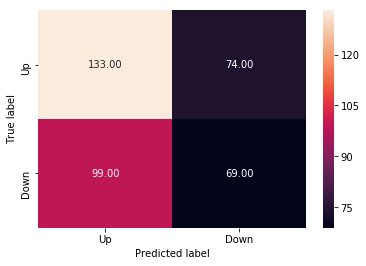

In [220]:
draw_cm( y_pred_df.actual, y_pred_df.predicted)

In [221]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.54


In [222]:
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted ),2 ) )

Precision :  0.57


In [223]:
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted ), 2 ) )

Recall :  0.64


In [224]:
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [1,0] )

In [225]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])

In [226]:
print('Sensitivity : ', round( sensitivity, 2) )

Sensitivity :  0.64


In [227]:
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Specificity :  0.41


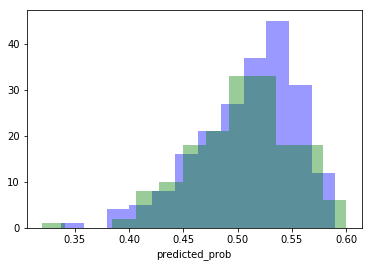

In [228]:
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b')
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g')

In [229]:
auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
round( float( auc_score ), 2 )

0.54

In [230]:
def draw_roc( actual, probs ):
 fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
 drop_intermediate = False )
 auc_score = metrics.roc_auc_score( actual, probs )
 plt.figure(figsize=(6, 4))
 plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
 plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver operating characteristic example')
 plt.legend(loc="lower right")
 plt.show()
 return fpr, tpr, thresholds

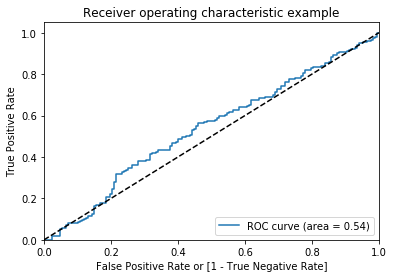

In [231]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob )

In [232]:
thresholds[0:10]

array([ 1.6003739 ,  0.6003739 ,  0.59279532,  0.59227634,  0.59075555,
        0.58973143,  0.58784597,  0.58585448,  0.58414821,  0.58373617])

In [233]:
fpr[0:10]

array([ 0.        ,  0.00595238,  0.01190476,  0.01785714,  0.02380952,
        0.02380952,  0.02380952,  0.02380952,  0.02380952,  0.0297619 ])

In [234]:
tpr[0:10]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00483092,  0.00966184,  0.01449275,  0.01932367,  0.01932367])

In [235]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.48 else 0)

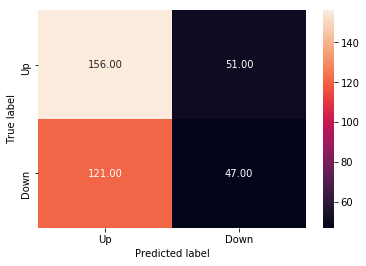

In [236]:
draw_cm( y_pred_df.actual, y_pred_df.predicted_new )

In [237]:
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Precision : ',np.round( metrics.precision_score( y_test, y_pred_df.predicted_new ), 2 ) )
print( 'Recall : ',np.round( metrics.recall_score( y_test, y_pred_df.predicted_new ), 2) )
cm1 = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted_new, [1,0] )
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Total Accuracy :  0.54
Precision :  0.56
Recall :  0.75
Sensitivity :  0.75
Specificity :  0.28


## Total accuracy of the model is 54%.
## As the threshold decreases, the (Actual "Down" predicted "Up") increases faster than the (Actual "up" predicted "Down"). For threshold increasing it is vice-versa.